We have the analytic solution to the heat equation given by

\begin{equation}
    \theta(x, t) = f(t)(1 - x) + \phi(x, t),
\end{equation}

where $f(t) = t(1-t)$ and $\phi(x, t) = \sum_{n=1}^{\infty} B_n(t) \sin(n\pi x)$. The Fourier coefficients are given by
\begin{equation}
    B_n(t) = \frac{2}{n^5\pi^5} \left[2tn^2\pi^2 - n^2\pi^2 - 2 + \left( n^2\pi^2 + 2 \right) e^{-n^2\pi^2 t}\right].
\end{equation}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    '''
    Function f(t) = t(1-t).
    '''
    return t * (1 - t)

def B_n(n, t):
    '''
    Computes the nth Fourier coefficient B_n(t).
    '''
    if n == 0:
        return 0  # Fourier sine series starts from n = 1.
    pi = np.pi
    factor = 2 / (n**5 * pi**5)
    term_1 = 2 * t * n**2 * pi**2
    term_2 = - n**2 * pi**2
    term_3 = - 2
    term_4 = (n**2 * pi**2 + 2)
    exp_factor = np.exp(-n**2 * pi**2 * t)
    return factor * (term_1 + term_2 + term_3 + term_4 * exp_factor)

def theta_analytic(x, t, num_terms=100):
    '''
    Computes the analytic solution theta(x, t).
    '''
    if t <= 0:
        return 0
    phi_sum = sum(B_n(n, t) * np.sin(n * np.pi * x) for n in range(1, num_terms + 1))
    return f(t) * (1 - x) + phi_sum

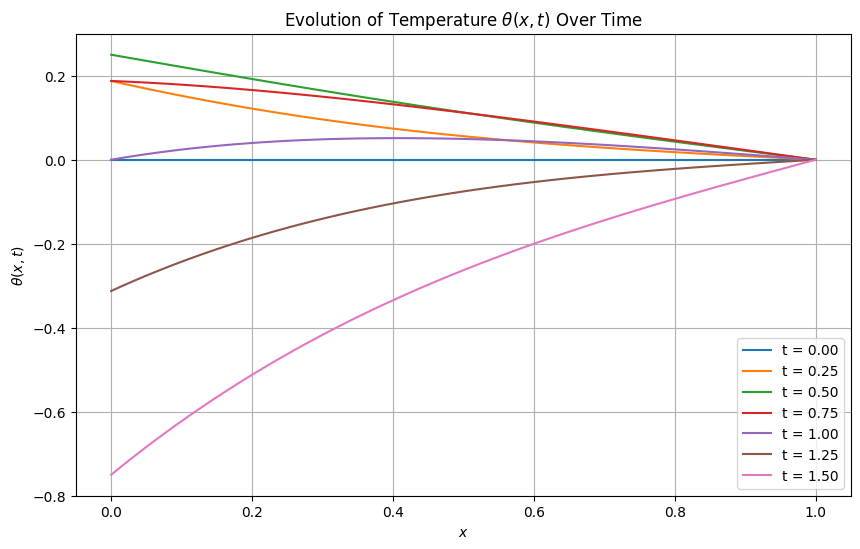

In [ ]:
# Generate x values
x = np.linspace(0.0, 1.0, 100)
# Chosen t values
t_values = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5]

plt.figure(figsize=(10, 6))

for t_val in t_values:
    theta_vals = [theta_analytic(xi, t_val, num_terms=200) for xi in x] # Increased num_terms for better accuracy
    plt.plot(x, theta_vals, label=f't = {t_val:.2f}')

plt.title(r'Evolution of Temperature $\theta(x, t)$ Over Time')
plt.xlabel(r'$x$')
plt.ylabel(r'$\theta(x, t)$')
plt.legend()
plt.grid(True)
plt.show()

*   Convergence of the Series: For this specific problem, the coefficients $B_n(t)$ decay as $1/n^3$. Summing a finite number of terms $N$ means we are truncating the infinite series. The error introduced by this truncation is typically on the order of the first omitted term which will decrease very rapidly as $N$ increases.

*   Boundary conditions check: The analytic solution for $\phi(x, t)$ has homogeneous Dirichlet boundary conditions $\phi(0, t) = 0$ and $\phi(1, t) = 0 $. We should check that $\theta(0, t) = f(t)$ indeed equals $f(t)$ and $\theta(1, t) = 0$ equals $0$ when computed by the program. Our choice of Fourier sine series automatically satisfies these for $\phi$.

*   Initial condition check: Similarly, check that $\theta(x, 0) = 0$ for all $x \in [0,1]$. In our formula, $f(0) = 0$ and $B_n(0) = 0$, so this condition should be met precisely.

*   Physical reasonableness: For a heat equation, we expect smooth profiles, and temperature should not exhibit unphysical oscillations or unbounded growth (unless driven by a source term, which is not the case here for $\phi$ specifically in the long run, and the overall solution should remain bounded).

The initial value problem describes heat conduction down a bar, where the temperature at one end $x = 0$ varies as $f(t)=t(1−t)$, and the other end $x = 1$ is held at zero temperature.

*   Initial state $t=0$: The entire bar is at zero temperature, $\theta(x, 0) = 0$ given by the initial condition.

*   Early Time $0 < t \leq 0.5$:
As $t$ increases from $0$, the temperature at $x=0$ given by $f(t)$, starts to rise from $0$. It increases quadratically, reaching a maximum of $0.25$ at $t=0.5$. This rising temperature at the heat source cases heat to diffuse into the bar from this end. The temperature profile in the bar will start to show a gradient, with higher temperatures near $x=0$ and gradually decreasing towards $x=1$, where it's fixed at zero.

*   Mid-Time $0.5 < t \leq 1.0$:
After $t=0.5$, the temperature at $x=0$ starts to decrease, returning to $0$ at $t=1$. During this phase, heat is still propagating through the bar from the initial rise. However, the source at is now cooling down. The temperature profile within the bar will reflect both the delayed arrival of the peak temperature and the subsequent cooling effect. The peak temperature in the bar will likely propagate inwards and then dissipate.

Later Time $t > 1.0$:
After $t=1$, the boundary condition at $x=0$ becomes negative. Any heat remaining within the bar will continue to diffuse outwards towards the ends and is lost to the boundary. This decay will typically follow an exponential decay, dominated by the lowest modes of the Fourier series (corresponding to the largest characteristic diffusion times). The solution will approach the steady state linear solution.